In [107]:
# VAA 공격형 

from base_functions import *

start, end =  "2020-01-10", "2022-10-10"
riskTickers = {
    "snp":"^GSPC", #미국 대형주
    "efa": "EFA", #선진국 주식
    "eem": "EEM", #개발도상국 주식
    "agg": "AGG", #미국 혼합채권
}

safeTickers = {
    "lqd": "LQD", #미국 회사채
    "ief": "IEF", #미국 중기국채
    "shy": "SHY", #미국 단기국채 
}

riskCloseData = getCloseDataAll(riskTickers, start, end)
safeCloseData = getCloseDataAll(safeTickers, start, end)
print(f"risk:\n{riskCloseData}\nsafe:\n{safeCloseData}")


risk:
                    snp        efa        eem         agg
Date                                                     
2020-01-09  3274.699951  69.709999  45.349998  112.790001
2020-01-10  3265.350098  69.449997  45.590000  112.980003
2020-01-13  3288.129883  69.809998  46.299999  112.910004
2020-01-14  3283.149902  69.879997  46.040001  113.010002
2020-01-15  3289.290039  69.879997  45.680000  113.180000
2020-01-16  3316.810059  70.169998  45.970001  113.180000
2020-01-17  3329.620117  70.379997  46.230000  113.050003
2020-01-21  3320.790039  69.820000  45.060001  113.370003
2020-01-22  3321.750000  69.959999  45.430000  113.430000
2020-01-23  3325.540039  69.790001  44.959999  113.580002
2020-01-24  3295.469971  69.489998  44.599998  113.790001
2020-01-27  3243.629883  68.050003  43.060001  114.139999
2020-01-28  3276.239990  68.690002  43.419998  114.040001
2020-01-29  3273.399902  68.699997  43.630001  114.300003
2020-01-30  3283.659912  68.639999  42.980000  114.309998
2020-01-

In [95]:
def getRiskWeights(closeDataSet):
    priceOnRebalDate = closeDataSet.loc[getRebalancingDate(closeDataSet)] # 리밸런싱 일자의 가격 데이터
    momentumScore = priceOnRebalDate.copy()
    
    for month, weight in [[12, 1], [4, 3], [2, 6], [1, 12]]:
        momentumScore += (priceOnRebalDate - priceOnRebalDate.shift(month).fillna(method="bfill")) * weight
    #print(momentumScore)

    momentumScore = momentumScore[momentumScore.min(axis=1) > 0]
    print(momentumScore)

    weight = pd.DataFrame([], index=priceOnRebalDate.index, columns=priceOnRebalDate.columns)
    max_values = momentumScore.idxmax(axis=1)
    for idx, asset in max_values.iteritems():
        weight.loc[idx][asset] = 1.0
    weight.fillna(0, inplace=True)
    
    
    return weight
     

riskWeights = getRiskWeights(riskCloseData)
riskWeights

                     snp         efa         eem         agg
Date                                                        
2020-01-31   3225.520020   67.480003   42.110001  114.650002
2020-04-30   5343.407471   16.229980   21.599968  152.939919
2020-05-29   6660.351562  102.199982   54.889988  149.930031
2020-06-30   5212.190674   90.709976   83.500046  141.119965
2020-07-31   8787.131592  111.009998  144.910000  164.699936
...                  ...         ...         ...         ...
2021-09-30   2454.370605   43.470062   11.520039   87.900070
2021-10-29  10934.715820  133.279938   41.979942   99.209976
2021-11-30   7123.791992   24.759933    6.470024  107.249924
2021-12-31   9861.754150   89.740067   23.049976   92.390091
2022-01-31   2624.623291   32.240005   39.630016   52.020065

[22 rows x 4 columns]


,snp,efa,eem,agg
Date,,,,
2020-01-31,1.0,0,0,0
2020-02-28,0.0,0,0,0
2020-03-31,0.0,0,0,0
2020-04-30,1.0,0,0,0
2020-05-29,1.0,0,0,0
...,...,...,...,...
2022-06-30,0.0,0,0,0
2022-07-29,0.0,0,0,0
2022-08-31,0.0,0,0,0


In [96]:
def getSafeWeights(closeDataSet):
    priceOnRebalDate = closeDataSet.loc[getRebalancingDate(closeDataSet)] # 리밸런싱 일자의 가격 데이터
    momentumScore = priceOnRebalDate.copy()
    
    for month, weight in [[12, 1], [4, 3], [2, 6], [1, 12]]:
        momentumScore += (priceOnRebalDate - priceOnRebalDate.shift(month).fillna(method="bfill")) * weight
    print(momentumScore)

    #momentumScore = momentumScore[momentumScore.min(axis=1) > 0]
    #print(momentumScore)

    weight = pd.DataFrame([], index=priceOnRebalDate.index, columns=priceOnRebalDate.columns)
    max_values = momentumScore.idxmax(axis=1)
    for idx, asset in max_values.iteritems():
        weight.loc[idx][asset] = 1.0
    weight.fillna(0, inplace=True)
    
    
    return weight

safeWeights = getSafeWeights(safeCloseData)
safeWeights

                   lqd         ief         shy
Date                                          
2020-01-31  131.089996  114.040001   85.120003
2020-02-28  156.159912  188.100029   99.150017
2020-03-31  -56.329826  246.520042  113.449890
2020-04-30  171.349991  180.929901  101.500061
2020-05-29  221.000122  159.540054   91.080048
...                ...         ...         ...
2022-06-30  -26.950058   44.350082   66.730034
2022-07-29  130.200012  131.269920   80.230072
2022-08-31    4.609924   20.180069   64.379974
2022-09-30 -118.900040  -59.710068   45.849953
2022-10-10  -14.089935   -1.869911   60.520004

[34 rows x 3 columns]


,lqd,ief,shy
Date,,,
2020-01-31,1.0,0.0,0.0
2020-02-28,0.0,1.0,0.0
2020-03-31,0.0,1.0,0.0
2020-04-30,0.0,1.0,0.0
2020-05-29,1.0,0.0,0.0
...,...,...,...
2022-06-30,0.0,0.0,1.0
2022-07-29,0.0,1.0,0.0
2022-08-31,0.0,0.0,1.0


In [128]:
pd.set_option("display.max_rows", 10)
def getWeights(riskWeights, safeWeights):
    weights = pd.concat([riskWeights, safeWeights], axis=1) * 0
    for risk, safe in zip(riskWeights.iloc, safeWeights.iloc):
        if sum(risk) >= sum(safe):
            weights.loc[risk.name] = risk
        else:
            weights.loc[safe.name] = safe

    weights.fillna(0, inplace=True)           
    return weights

weights = getWeights(riskWeights, safeWeights)
weights


,snp,efa,eem,agg,lqd,ief,shy
Date,,,,,,,
2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-03-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-07-29,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
closeData = pd.concat([riskCloseData, safeCloseData], axis=1)
dayRet, cumRet = getRebalancingPortfolio(closeData, weightDf=weights)
cagr, dd, mdd = getEval(cumRet)
print(cumRet)

return: 1.244965400030274 
 cagr: 1.0847161456988863 
 mdd: 17.720709970314676
Date
2020-01-31    1.000000
2020-02-03    1.007255
2020-02-04    1.022344
2020-02-05    1.033846
2020-02-06    1.037284
                ...   
2022-10-04    1.249730
2022-10-05    1.248501
2022-10-06    1.246963
2022-10-07    1.245426
2022-10-10    1.244965
Length: 679, dtype: float64


<Figure size 640x480 with 0 Axes>

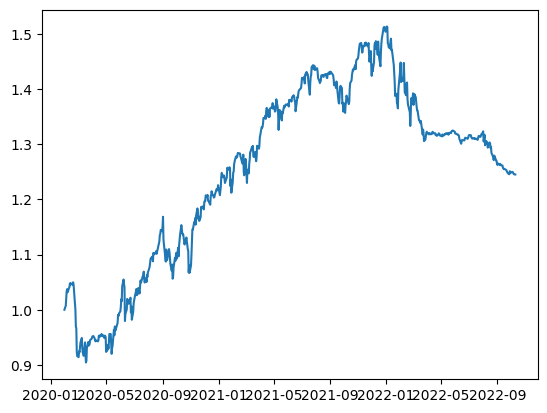

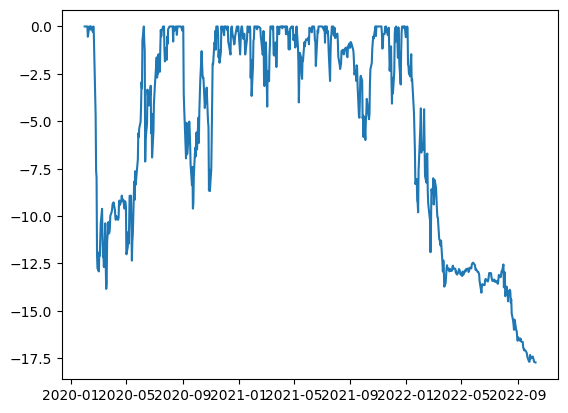

In [130]:
plt.figure()
plt.subplots()
plt.plot(cumRet)
plt.subplots()
plt.plot(-dd)